In [1]:
import scanpy as sc
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import getopt

In [2]:
#  plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [31]:
study = "Ramachandran"
data_dir = "/opt/datastore/aiakovliev/liver"
input_dir = os.path.join(data_dir, study)
file_list = os.path.join(input_dir, "metadata.txt")
sample_dirs = set(pd.read_csv(file_list)["sample.dir"].tolist())
print(sample_dirs)

{'/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041168', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041164', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041157', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041158', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041154', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041150', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041162', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041156', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041163', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041153', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041165', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041155', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041159', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041161', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041160', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041166', '/opt/datastore/aiakovliev/liver/Ramachandran/GSM404116

In [26]:
this_dir = sample_dirs[0]
print(this_dir)
# load count matrix in mtx format
counts_matrix = sc.read_10x_mtx(
    this_dir,  # the directory with the `.mtx` file
    var_names='gene_symbols',   # use gene symbols for the variable names (genes)
    cache=True                 # cache the data
)
# alternatively laod count matrix in h5 format (if available)
if False: 
    counts_matrix = sc.read_10x_h5(this_dir)
print(counts_matrix.__class__.__name__)
# counts_matrix = sc.read_10x_h5(os.path.join(this_dir, "matrix.mtx"))
#counts_matrix = scipy.io.mmread(input_dir + '/matrix.mtx').T.tocsc()
#genes = np.array(scr.load_genes(input_dir + '/features.tsv', delimiter='\t', column=1))
#print('Counts matrix shape: {} rows, {} columns'.format(counts_matrix.shape[0], counts_matrix.shape[1]))
#print('Number of genes in gene list: {}'.format(len(genes)))

/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041150
AnnData


EDR: 0.014904
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.17
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 38.9%
Overall doublet rate:
	Expected   = 1.5%
	Estimated  = 1.1%
Elapsed time: 2.9 seconds
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 27.4%
Overall doublet rate:
	Expected   = 1.5%
	Estimated  = 1.2%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041150/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041150/scrublet_EDR0.008_PredictedDoublets.csv


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

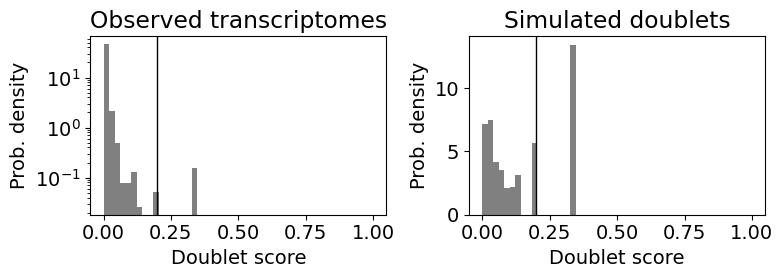

In [27]:
# doublet rates in 1000 cells normally ~0.8% per 1k cells
edr = 0.008
expected_doublet_rate = float(edr)*counts_matrix.shape[0]/1000
print('EDR: {}'.format(expected_doublet_rate))
scrub = scr.Scrublet(counts_matrix.X, expected_doublet_rate = float(expected_doublet_rate))
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2,
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=60, 
                                                          n_prin_comps=30,
                                                          log_transform=True,
                                                          mean_center=True,
                                                          normalize_variance=True,
                                                          synthetic_doublet_umi_subsampling = 1)
# after examining the bimodal distribution by eye, insert the threshold here
scrub.call_doublets(threshold=0.20)
scrub.plot_histogram()

outf1 = this_dir + "/scrublet_EDR" + str(edr) + "_DoubletScores.csv"
outf2 = this_dir + "/scrublet_EDR" + str(edr) + "_PredictedDoublets.csv"
np.savetxt(outf1, doublet_scores, delimiter=',')
np.savetxt(outf2, predicted_doublets, delimiter=',')
print("Saved " + outf1)
print("Saved " + outf2)

In [33]:
for s in sample_dirs:
    outf1 = s + "/scrublet_EDR" + str(edr) + "_DoubletScores.csv"
    print(outf1)

/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041168/scrublet_EDR0.008_DoubletScores.csv
/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041164/scrublet_EDR0.008_DoubletScores.csv
/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041157/scrublet_EDR0.008_DoubletScores.csv
/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041158/scrublet_EDR0.008_DoubletScores.csv
/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041154/scrublet_EDR0.008_DoubletScores.csv
/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041150/scrublet_EDR0.008_DoubletScores.csv
/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041162/scrublet_EDR0.008_DoubletScores.csv
/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041156/scrublet_EDR0.008_DoubletScores.csv
/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041163/scrublet_EDR0.008_DoubletScores.csv
/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041153/scrublet_EDR0.008_DoubletScores.csv
/opt/datastore/aiakovliev/liver/Ramachandran/GSM4041165/scrublet_EDR0.008_Double

EDR: 0.038552
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.47
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 6.7%
Overall doublet rate:
	Expected   = 3.9%
	Estimated  = 4.3%
Elapsed time: 6.0 seconds
Detected doublet rate = 3.3%
Estimated detectable doublet fraction = 52.6%
Overall doublet rate:
	Expected   = 3.9%
	Estimated  = 6.2%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041168/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041168/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.027296
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.20
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 51.3%
Overall doublet rate:
	Expected   = 2.7%
	Estimated  = 2.5%
Elapsed time: 5.4 seconds
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 51.3%
Overall doublet rate:
	Expected   = 2.7%
	Estimated  = 2.5%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041164/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041164/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.009248
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


/home/aiakovliev/repos/liver-stator/venv/lib/python3.8/site-packages/scrublet/scrublet.py:464: RuntimeWarning: invalid value encountered in scalar divide
  self.overall_doublet_rate_ = self.detected_doublet_rate_ / self.detectable_doublet_fraction_
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.09
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 35.1%
Overall doublet rate:
	Expected   = 0.9%
	Estimated  = 2.2%
Elapsed time: 2.2 seconds
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 0.9%
	Estimated  = nan%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041157/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041157/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.039496
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.19
Detected doublet rate = 3.8%
Estimated detectable doublet fraction = 77.0%
Overall doublet rate:
	Expected   = 3.9%
	Estimated  = 4.9%
Elapsed time: 6.9 seconds
Detected doublet rate = 3.8%
Estimated detectable doublet fraction = 77.0%
Overall doublet rate:
	Expected   = 3.9%
	Estimated  = 4.9%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041158/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041158/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.037503999999999996
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.27
Detected doublet rate = 2.1%
Estimated detectable doublet fraction = 55.5%
Overall doublet rate:
	Expected   = 3.8%
	Estimated  = 3.8%
Elapsed time: 7.0 seconds
Detected doublet rate = 2.6%
Estimated detectable doublet fraction = 62.7%
Overall doublet rate:
	Expected   = 3.8%
	Estimated  = 4.2%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041154/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041154/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.014904
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.17
Detected doublet rate = 0.4%
Estimated detectable doublet fraction = 38.9%
Overall doublet rate:
	Expected   = 1.5%
	Estimated  = 1.1%
Elapsed time: 2.6 seconds
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 27.4%
Overall doublet rate:
	Expected   = 1.5%
	Estimated  = 1.2%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041150/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041150/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.013488
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.15
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 20.6%
Overall doublet rate:
	Expected   = 1.3%
	Estimated  = 1.2%
Elapsed time: 3.1 seconds
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 14.6%
Overall doublet rate:
	Expected   = 1.3%
	Estimated  = 0.4%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041162/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041162/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.02584
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.20
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 43.1%
Overall doublet rate:
	Expected   = 2.6%
	Estimated  = 2.8%
Elapsed time: 5.4 seconds
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 43.1%
Overall doublet rate:
	Expected   = 2.6%
	Estimated  = 2.8%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041156/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041156/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.016368
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.18
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 19.9%
Overall doublet rate:
	Expected   = 1.6%
	Estimated  = 1.7%
Elapsed time: 3.5 seconds
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 19.9%
Overall doublet rate:
	Expected   = 1.6%
	Estimated  = 1.7%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041163/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041163/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.052568
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.20
Detected doublet rate = 5.1%
Estimated detectable doublet fraction = 82.3%
Overall doublet rate:
	Expected   = 5.3%
	Estimated  = 6.2%
Elapsed time: 9.0 seconds
Detected doublet rate = 5.1%
Estimated detectable doublet fraction = 82.3%
Overall doublet rate:
	Expected   = 5.3%
	Estimated  = 6.2%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041153/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041153/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.029384
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.36
Detected doublet rate = 0.5%
Estimated detectable doublet fraction = 20.8%
Overall doublet rate:
	Expected   = 2.9%
	Estimated  = 2.2%
Elapsed time: 6.9 seconds
Detected doublet rate = 1.3%
Estimated detectable doublet fraction = 43.5%
Overall doublet rate:
	Expected   = 2.9%
	Estimated  = 2.9%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041165/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041165/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.026359999999999998
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.17
Detected doublet rate = 2.0%
Estimated detectable doublet fraction = 70.2%
Overall doublet rate:
	Expected   = 2.6%
	Estimated  = 2.9%
Elapsed time: 4.6 seconds
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 66.8%
Overall doublet rate:
	Expected   = 2.6%
	Estimated  = 2.9%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041155/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041155/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.026448
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.16
Detected doublet rate = 2.2%
Estimated detectable doublet fraction = 65.4%
Overall doublet rate:
	Expected   = 2.6%
	Estimated  = 3.4%
Elapsed time: 6.1 seconds
Detected doublet rate = 1.9%
Estimated detectable doublet fraction = 60.7%
Overall doublet rate:
	Expected   = 2.6%
	Estimated  = 3.1%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041159/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041159/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.019039999999999998
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.21
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 29.9%
Overall doublet rate:
	Expected   = 1.9%
	Estimated  = 2.4%
Elapsed time: 3.6 seconds
Detected doublet rate = 0.7%
Estimated detectable doublet fraction = 29.9%
Overall doublet rate:
	Expected   = 1.9%
	Estimated  = 2.4%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041161/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041161/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.040976
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.27
Detected doublet rate = 1.8%
Estimated detectable doublet fraction = 51.8%
Overall doublet rate:
	Expected   = 4.1%
	Estimated  = 3.4%
Elapsed time: 7.9 seconds
Detected doublet rate = 2.5%
Estimated detectable doublet fraction = 63.4%
Overall doublet rate:
	Expected   = 4.1%
	Estimated  = 3.9%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041160/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041160/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.015880000000000002
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.17
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 16.4%
Overall doublet rate:
	Expected   = 1.6%
	Estimated  = 1.5%
Elapsed time: 3.0 seconds
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 16.4%
Overall doublet rate:
	Expected   = 1.6%
	Estimated  = 1.5%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041166/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041166/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.023376
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.29
Detected doublet rate = 0.6%
Estimated detectable doublet fraction = 16.3%
Overall doublet rate:
	Expected   = 2.3%
	Estimated  = 3.8%
Elapsed time: 4.2 seconds
Detected doublet rate = 1.2%
Estimated detectable doublet fraction = 30.4%
Overall doublet rate:
	Expected   = 2.3%
	Estimated  = 4.1%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041169/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041169/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.003824
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...


/home/aiakovliev/repos/liver-stator/venv/lib/python3.8/site-packages/scrublet/scrublet.py:464: RuntimeWarning: invalid value encountered in scalar divide
  self.overall_doublet_rate_ = self.detected_doublet_rate_ / self.detectable_doublet_fraction_
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Calculating doublet scores...
Automatically set threshold at doublet score = 0.03
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 10.9%
Overall doublet rate:
	Expected   = 0.4%
	Estimated  = 0.0%
Elapsed time: 0.5 seconds
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 0.4%
	Estimated  = nan%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041152/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041152/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.028815999999999998
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Automatically set threshold at doublet score = 0.25
Detected doublet rate = 0.9%
Estimated detectable doublet fraction = 29.0%
Overall doublet rate:
	Expected   = 2.9%
	Estimated  = 3.2%
Elapsed time: 5.8 seconds
Detected doublet rate = 1.4%
Estimated detectable doublet fraction = 38.2%
Overall doublet rate:
	Expected   = 2.9%
	Estimated  = 3.8%


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041167/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041167/scrublet_EDR0.008_PredictedDoublets.csv
EDR: 0.008312
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.08
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 14.3%
Overall doublet rate:
	Expected   = 0.8%
	Estimated  = 0.7%
Elapsed time: 1.5 seconds
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 0.8%
	Estimated  = nan%


/home/aiakovliev/repos/liver-stator/venv/lib/python3.8/site-packages/scrublet/scrublet.py:464: RuntimeWarning: invalid value encountered in scalar divide
  self.overall_doublet_rate_ = self.detected_doublet_rate_ / self.detectable_doublet_fraction_
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generi

Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041151/scrublet_EDR0.008_DoubletScores.csv
Saved /opt/datastore/aiakovliev/liver/Ramachandran/GSM4041151/scrublet_EDR0.008_PredictedDoublets.csv


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

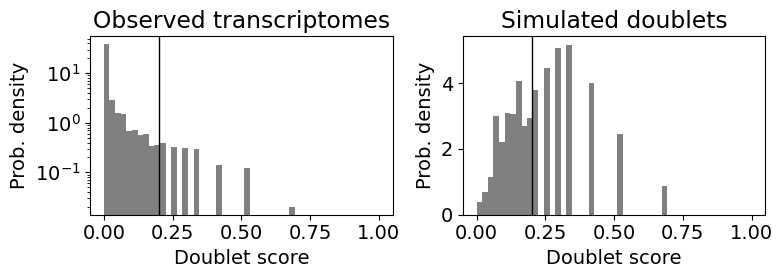

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

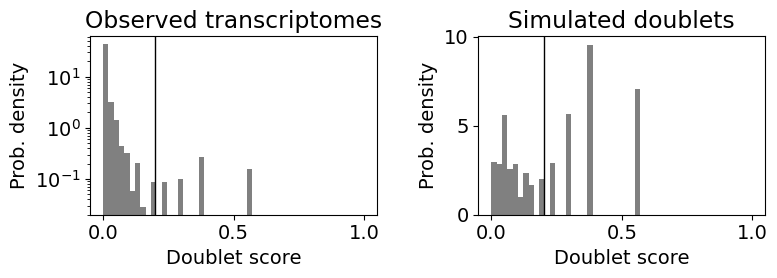

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

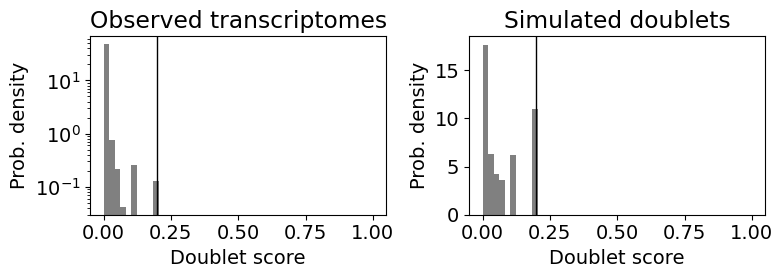

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

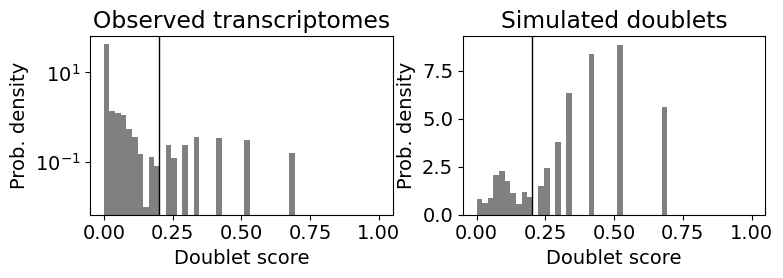

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

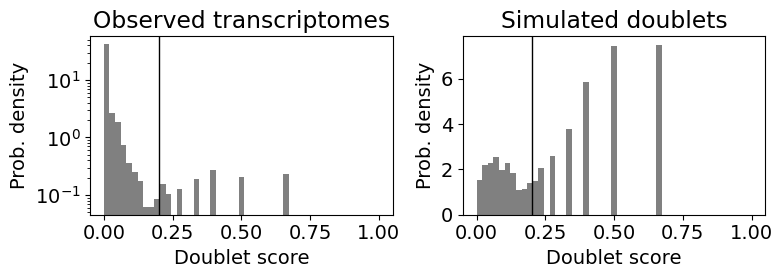

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

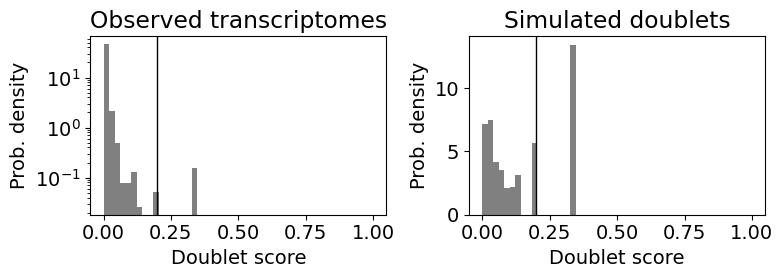

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

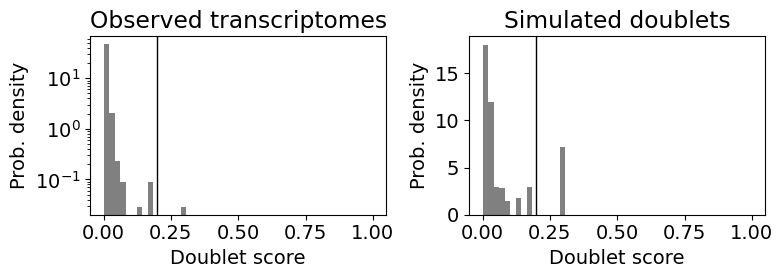

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

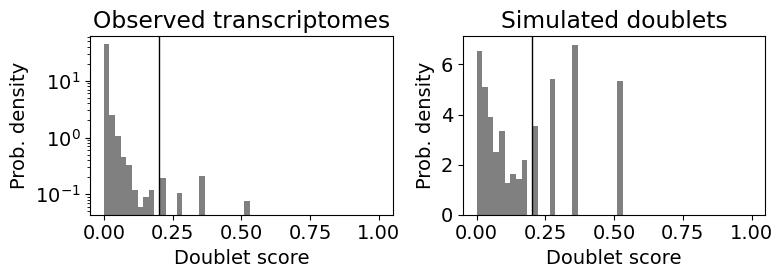

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

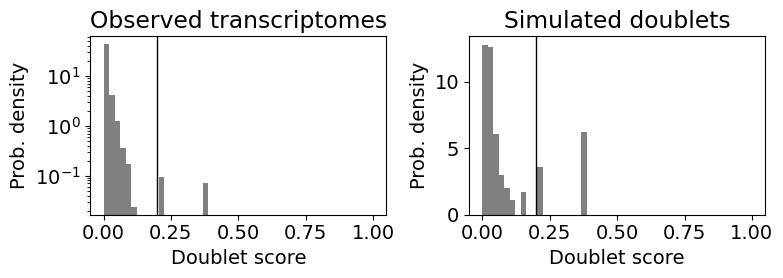

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

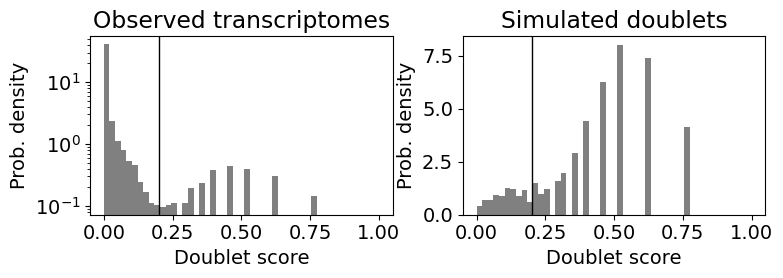

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

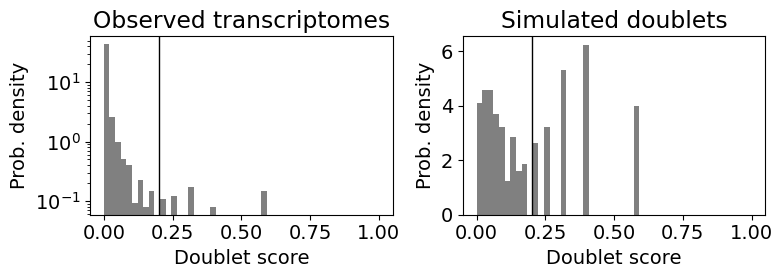

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

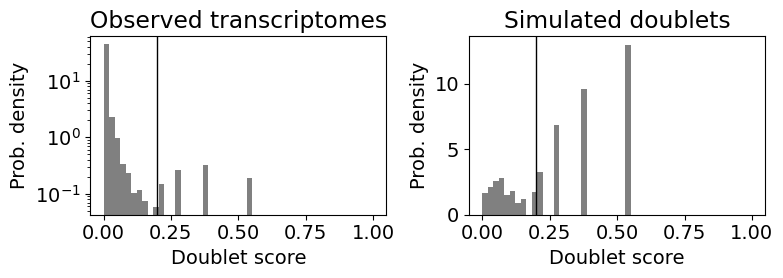

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

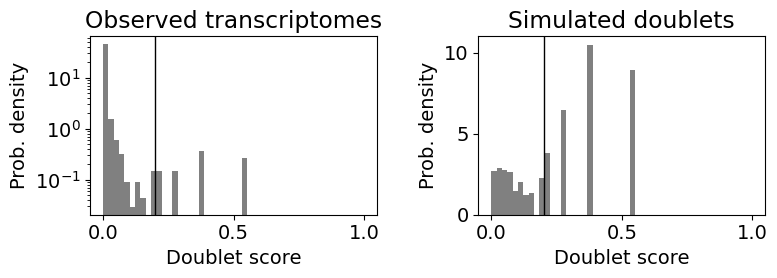

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

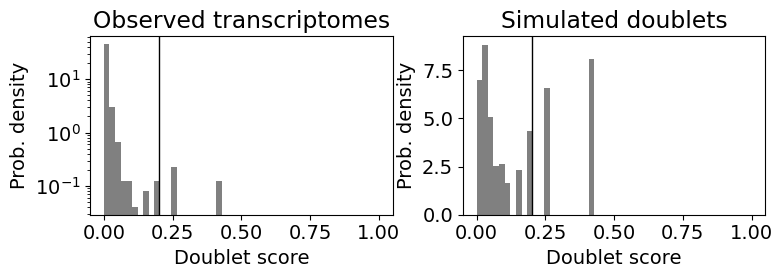

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

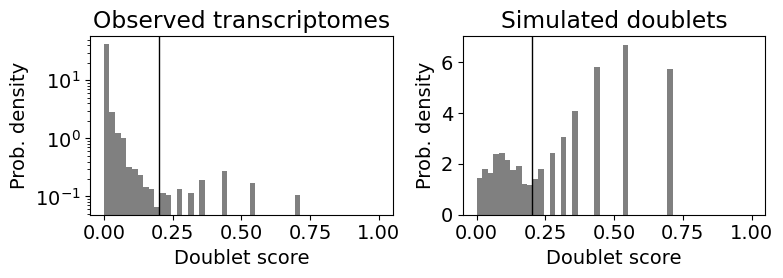

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

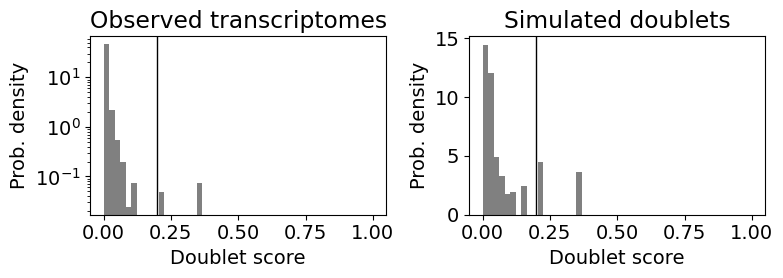

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

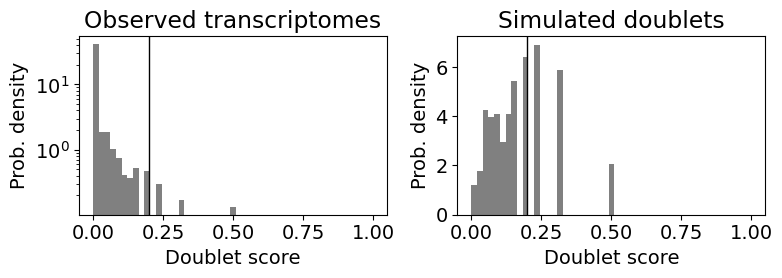

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

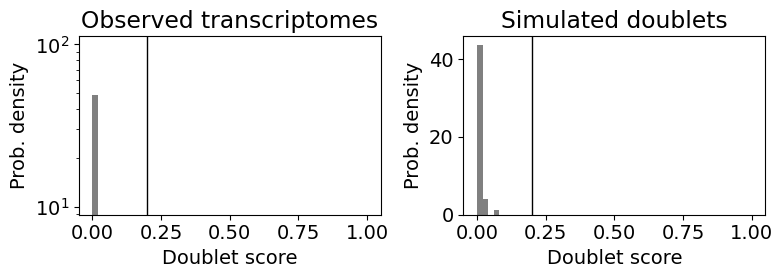

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

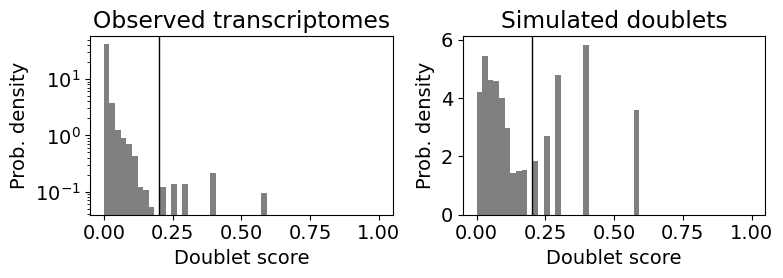

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

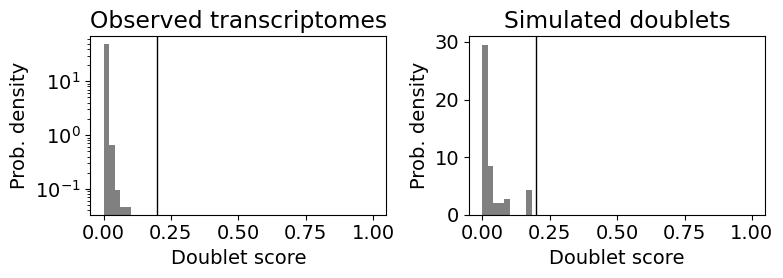

In [34]:
%matplotlib inline

for s in sample_dirs:
    
    # load count matrix
    if False:
        counts_matrix=sc.read_10x_h5(s)

    counts_matrix=sc.read_10x_mtx(
        s,
        var_names='gene_symbols',
        cache=True
    )
    
    # doublet rates in 1000 cells normally ~0.8% per 1k cells
    edr = 0.008
    expected_doublet_rate = float(edr)*counts_matrix.shape[0]/1000
    print('EDR: {}'.format(expected_doublet_rate))
    
    scrub = scr.Scrublet(counts_matrix.X, expected_doublet_rate = float(expected_doublet_rate))
    
    doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2,
                                                      min_cells=3, 
                                                      min_gene_variability_pctl=60, 
                                                      n_prin_comps=30,
                                                      log_transform=True,
                                                      mean_center=True,
                                                      normalize_variance=True,
                                                      synthetic_doublet_umi_subsampling = 1)
    
    # after examining the bimodal distribution by eye, insert the threshold here
    scrub.call_doublets(threshold=0.20)
    scrub.plot_histogram()

    outf1 = s + "/scrublet_EDR" + str(edr) + "_DoubletScores.csv"
    outf2 = s + "/scrublet_EDR" + str(edr) + "_PredictedDoublets.csv"
    np.savetxt(outf1, doublet_scores, delimiter=',')
    np.savetxt(outf2, predicted_doublets, delimiter=',')
    print("Saved " + outf1)
    print("Saved " + outf2)


## Check 2 of the samples that look different

/Users/akhamseh/opt/anaconda3/envs/scanpy-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/akhamseh/opt/anaconda3/envs/scanpy-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


EDR: 0.007208
Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.06
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 42.4%
Overall doublet rate:
	Expected   = 0.7%
	Estimated  = 3.9%
Elapsed time: 2.5 seconds
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 0.7%
	Estimated  = nan%


/Users/akhamseh/opt/anaconda3/envs/scanpy-env/lib/python3.9/site-packages/scrublet/scrublet.py:466: RuntimeWarning: invalid value encountered in scalar divide
  self.overall_doublet_rate_ = self.detected_doublet_rate_ / self.detectable_doublet_fraction_


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

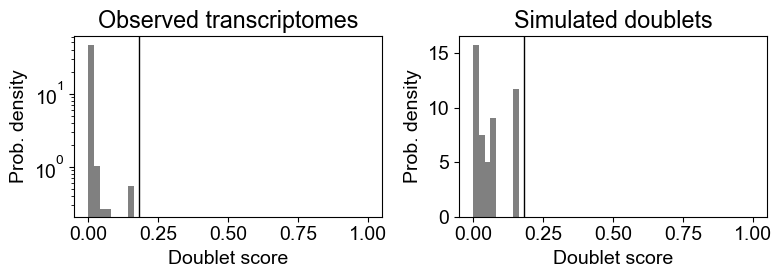

In [10]:
# load count matrix
counts_matrix = sc.read_10x_mtx(
    this_dir,  # the directory with the `.mtx` file
    var_names='gene_symbols',   # use gene symbols for the variable names (genes)
    cache=True                 # cache the data
)
# alternatively laod count matrix in h5 format (if available)
if False: 
    counts_matrix = sc.read_10x_h5(this_dir)
    
# doublet rates in 1000 cells normally ~0.8% per 1k cells
edr = 0.008
expected_doublet_rate = float(edr)*counts_matrix.shape[0]/1000
print('EDR: {}'.format(expected_doublet_rate))
    
scrub = scr.Scrublet(counts_matrix.X, expected_doublet_rate = float(expected_doublet_rate))
    
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2,
                                                          min_cells=3,
                                                          min_gene_variability_pctl=60, 
                                                          n_prin_comps=30,
                                                          log_transform=True,
                                                          mean_center=True,
                                                          normalize_variance=True,
                                                          synthetic_doublet_umi_subsampling = 1)
    
# after examining the bimodal distribution by eye, insert the threshold here
scrub.call_doublets(threshold=0.2)
scrub.plot_histogram()